In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #导入数据集iris  
from pandas.plotting import radviz
%matplotlib inline

In [2]:
iris = load_iris() #载入数据集
print(iris.data)  #打印输出显示

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002164830F790>,
      dtype=object)

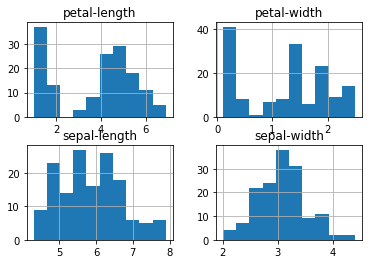

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']  
dataset = pd.read_csv(url, names=names)
dataset.hist() #数据直方图histograms

In [5]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


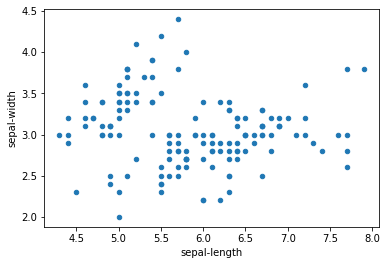

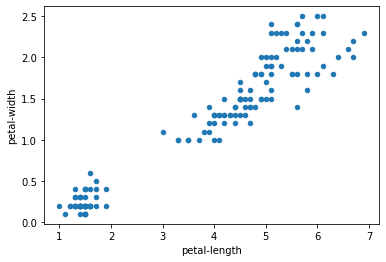

In [9]:
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter') #散点图，x轴表示sepal-length花萼长度，y轴表示sepal-width花萼宽度
dataset.plot(x='petal-length', y='petal-width', kind='scatter') #散点图，x轴表示petal-length花萼长度，y轴表示petal-width花萼宽度

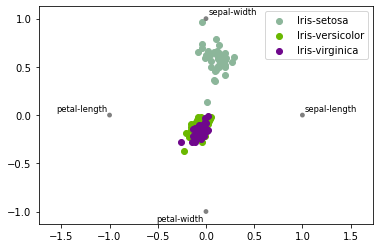

In [16]:
radviz(dataset,'class')#雷达图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021649EC42E0>,
      dtype=object)

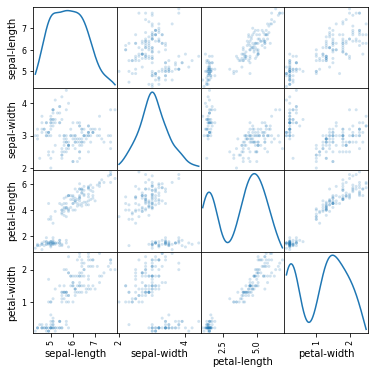

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(6, 6), diagonal='kde')

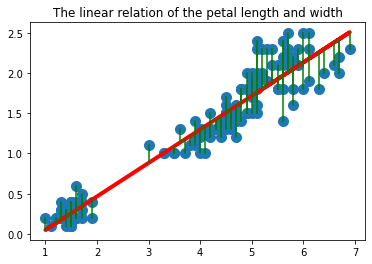

In [19]:
pos = pd.DataFrame(dataset)
#获取花瓣的长和宽，转换Series为ndarray
x = pos['petal-length'].values
y = pos['petal-width'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

from sklearn.linear_model import LinearRegression  #从sklearn库中调用线性回归算法
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)

plt.scatter(x,y,s=100)
plt.plot(x,pre,'r-',linewidth=4)
for idx, m in enumerate(x):  
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')  
plt.title('The linear relation of the petal length and width')
plt.show()

In [22]:
print(u"slope:", clf.coef_ )#求斜率

slope: [[0.41641913]]


In [24]:
print(u"When the length of petal is 5.0, we can predict that the width is:", clf.predict([[5.0]]))

When the length of petal is 5.0, we can predict that the width is: [[1.71558162]]


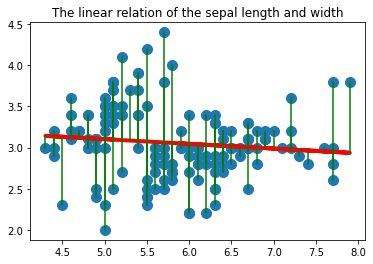

In [25]:
pos = pd.DataFrame(dataset)
#获取花萼的长和宽，转换Series为ndarray
x = pos['sepal-length'].values
y = pos['sepal-width'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)

plt.scatter(x,y,s=100)
plt.plot(x,pre,'r-',linewidth=4)
for idx, m in enumerate(x):  
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')  
plt.title('The linear relation of the sepal length and width')
plt.show()

In [26]:
print(u"slope:", clf.coef_ )#求斜率
print(u"When the length of sepal is 5.0, we can predict that the width is:", clf.predict([[5.0]]))

slope: [[-0.05726823]]
When the length of sepal is 5.0, we can predict that the width is: [[3.10229621]]
